In [64]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [65]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [66]:
y = (y != 0).astype(int)

In [67]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            
            dw = np.dot(X.T, (y_pred - y)) / self.m
            db = np.sum(y_pred - y) / self.m
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Optional: Monitor loss
            if _ % 100 == 0:
                print(f"Epoch {_} - Loss: {self.loss(y, y_pred):.4f}")
            
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int)

    def plot_decision_boundary(X, y, model):
        # Create a meshgrid of values
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        
        # Predict on the grid
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = model.predict(grid).reshape(xx.shape)
        
        # Plot the decision boundary and points
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, probs, alpha=0.3, cmap=plt.cm.RdYlBu)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdYlBu)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Logistic Regression Decision Boundary')
        plt.show()


    

In [70]:
# 3. Train the model
model = LogisticRegressionScratch(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

Epoch 0 - Loss: 0.6931
Epoch 100 - Loss: 0.1797
Epoch 200 - Loss: 0.1192
Epoch 300 - Loss: 0.0943
Epoch 400 - Loss: 0.0801
Epoch 500 - Loss: 0.0708
Epoch 600 - Loss: 0.0640
Epoch 700 - Loss: 0.0589
Epoch 800 - Loss: 0.0548
Epoch 900 - Loss: 0.0514


In [71]:
# 4. Predict and evaluate
y_pred = model.predict(X_test)

In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


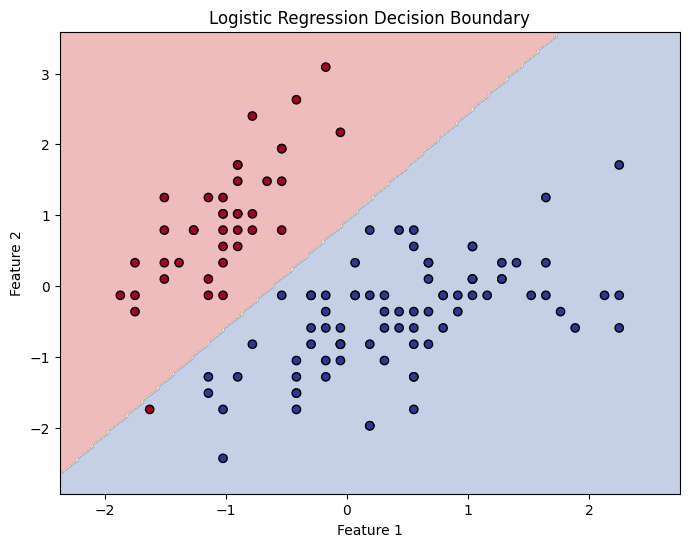

In [73]:
# Plot
plot_decision_boundary(X_train, y_train, model)